# **Data Pre-processing**

## **Import Libraries**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score, roc_curve, roc_auc_score, auc, silhouette_samples, silhouette_score, adjusted_rand_score, accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle, Circle, Ellipse, Polygon, Wedge, Arrow

import numpy as np
import pandas as pd
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Load Dataset**

In [395]:
# data = pd.read_csv('/content/drive/MyDrive/Dataset/Global.csv')
data = pd.read_csv('/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Datasets/Global.csv')
data.head()

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,predicted,Label
0,34555.0,982.0,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,udp,224.0,...,610.0,NaN,NaN,NaN,0.0,0.0,0.0,144379.0,3:URLLC,Benign
1,531568.0,11362.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,udp,0.0,...,610.0,NaN,NaN,NaN,0.0,0.0,0.0,181691.0,3:URLLC,Benign
2,360399.0,70834.0,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,175580.0,3:URLLC,Benign
3,30702.0,440.0,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,120239.0,3:URLLC,Benign
4,312747.0,128397.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,348612.0,3:URLLC,Benign


In [396]:
data_backup = data
data_backup

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,predicted,Label
0,34555.000000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,udp,224.0,...,610.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.443790e+05,3:URLLC,Benign
1,531568.000000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,udp,0.0,...,610.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.816910e+05,3:URLLC,Benign
2,360399.000000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,udp,0.0,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.755800e+05,3:URLLC,Benign
3,30702.000000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,udp,0.0,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.202390e+05,3:URLLC,Benign
4,312747.000000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,udp,0.0,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,3.486120e+05,3:URLLC,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,tcp,0.0,...,NaN,NaN,1.202037e+09,148517648.0,0.595314,0.723920,0.032170,2.373585e+06,2:mMTC,Malicious
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,tcp,0.0,...,NaN,NaN,1.202037e+09,148517648.0,0.652207,0.874332,0.028468,2.367298e+06,2:mMTC,Malicious
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,tcp,0.0,...,NaN,NaN,1.202037e+09,148517648.0,0.876566,0.250007,0.041358,2.383580e+06,2:mMTC,Malicious
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,tcp,0.0,...,NaN,NaN,1.202037e+09,148517648.0,0.547553,0.645027,0.027258,2.384146e+06,2:mMTC,Malicious


## **Class Distribution Analysis Before Data Cleaning**

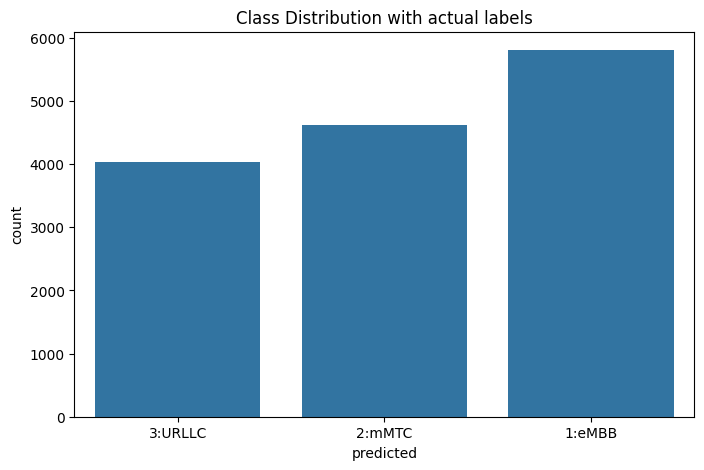

In [397]:
# Class Distribution Analysis before cleaning
plt.figure(figsize=(8, 5))
sns.countplot(x=data['predicted'])
plt.title('Class Distribution with actual labels')
plt.show()

In [398]:
# Rename the "predicted" column to "Slice Type"
data = data.rename(columns={'predicted': 'slice Type'})
# Replace values in the "Slice Type" column
data['slice Type'] = data['slice Type'].replace({'1:eMBB': 1, '2:mMTC': 2, '3:URLLC': 3})
data

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,slice Type,Label
0,34555.000000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,udp,224.0,...,610.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.443790e+05,3,Benign
1,531568.000000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,udp,0.0,...,610.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.816910e+05,3,Benign
2,360399.000000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,udp,0.0,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.755800e+05,3,Benign
3,30702.000000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,udp,0.0,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.202390e+05,3,Benign
4,312747.000000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,udp,0.0,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,3.486120e+05,3,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,tcp,0.0,...,NaN,NaN,1.202037e+09,148517648.0,0.595314,0.723920,0.032170,2.373585e+06,2,Malicious
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,tcp,0.0,...,NaN,NaN,1.202037e+09,148517648.0,0.652207,0.874332,0.028468,2.367298e+06,2,Malicious
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,tcp,0.0,...,NaN,NaN,1.202037e+09,148517648.0,0.876566,0.250007,0.041358,2.383580e+06,2,Malicious
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,tcp,0.0,...,NaN,NaN,1.202037e+09,148517648.0,0.547553,0.645027,0.027258,2.384146e+06,2,Malicious


In [399]:
np.unique(data['slice Type'])

array([1, 2, 3])

## **Data Cleaning**

### **Drop non-numeric columns**

In [400]:
# Print missing values count for each column
print(data.isna().sum())

X                 0
Seq               0
Dur               0
RunTime           0
Mean              0
Sum               0
Min               0
Max               0
Proto             0
sTos              1
dTos           3887
sDSb              0
dDSb              0
sTtl              1
dTtl           3923
sHops             1
dHops          3899
Cause             0
TotPkts           0
SrcPkts           0
DstPkts           0
TotBytes          0
SrcBytes          0
DstBytes          0
Offset            0
sMeanPktSz        0
dMeanPktSz        0
Load              0
SrcLoad           0
DstLoad           0
Loss              0
SrcLoss           0
DstLoss           0
pLoss             0
SrcGap         3113
DstGap         3113
Rate              0
SrcRate           0
DstRate           0
State             0
SrcWin         3230
DstWin         4243
sVid          14082
dVid          14452
SrcTCPBase     3113
DstTCPBase     4384
TcpRtt            0
SynAck            0
AckDat            0
UniqueID          0


In [401]:
# Function to check if a value can be converted to a numeric value
def is_numeric(value):
    try:
        pd.to_numeric(value)
        return True
    except ValueError:
        return False

# Check for non-numeric values in each column
non_numeric_columns = []
for column in data.columns:
    if not all(data[column].apply(is_numeric)):
        non_numeric_columns.append(column)

# Print columns with non-numeric values
if non_numeric_columns:
    print("Columns with non-numeric values:", non_numeric_columns)
else:
    print("All columns contain numeric values.")
print("Total Columns: ", len(data.columns))

Columns with non-numeric values: ['Proto', 'sDSb', 'dDSb', 'Cause', 'State', 'Label']
Total Columns:  52


In [402]:
data = data.drop(columns=non_numeric_columns)
data

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstWin,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,slice Type
0,34555.000000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,224.0,184.0,...,NaN,610.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.443790e+05,3
1,531568.000000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,...,NaN,610.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.816910e+05,3
2,360399.000000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.755800e+05,3
3,30702.000000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.202390e+05,3
4,312747.000000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,3.486120e+05,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,0.0,0.0,...,64896.0,NaN,NaN,1.202037e+09,148517648.0,0.595314,0.723920,0.032170,2.373585e+06,2
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,0.0,0.0,...,64896.0,NaN,NaN,1.202037e+09,148517648.0,0.652207,0.874332,0.028468,2.367298e+06,2
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,0.0,0.0,...,64896.0,NaN,NaN,1.202037e+09,148517648.0,0.876566,0.250007,0.041358,2.383580e+06,2
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,0.0,0.0,...,64896.0,NaN,NaN,1.202037e+09,148517648.0,0.547553,0.645027,0.027258,2.384146e+06,2


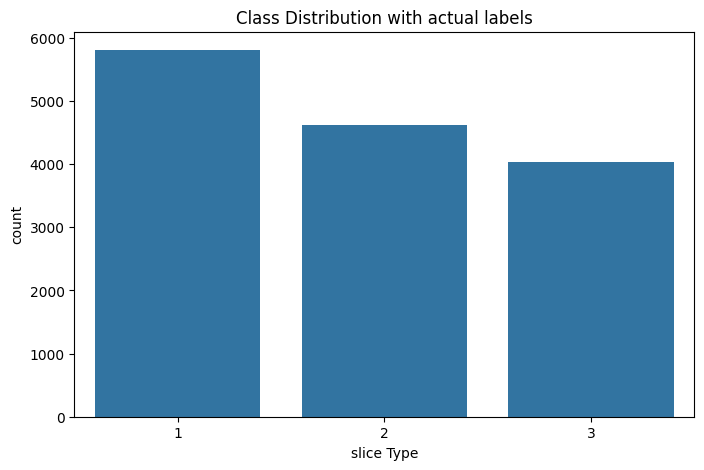

In [403]:
# Class Distribution Analysis after removing non-numeric columns
plt.figure(figsize=(8, 5))
sns.countplot(x=data['slice Type'])
plt.title('Class Distribution with actual labels')
plt.show()

In [404]:
# Print missing values count for each column
print(data.isna().sum())

X                 0
Seq               0
Dur               0
RunTime           0
Mean              0
Sum               0
Min               0
Max               0
sTos              1
dTos           3887
sTtl              1
dTtl           3923
sHops             1
dHops          3899
TotPkts           0
SrcPkts           0
DstPkts           0
TotBytes          0
SrcBytes          0
DstBytes          0
Offset            0
sMeanPktSz        0
dMeanPktSz        0
Load              0
SrcLoad           0
DstLoad           0
Loss              0
SrcLoss           0
DstLoss           0
pLoss             0
SrcGap         3113
DstGap         3113
Rate              0
SrcRate           0
DstRate           0
SrcWin         3230
DstWin         4243
sVid          14082
dVid          14452
SrcTCPBase     3113
DstTCPBase     4384
TcpRtt            0
SynAck            0
AckDat            0
UniqueID          0
slice Type        0
dtype: int64


### **Imputing**

In [405]:
# Print missing values count for each column
print(data.isna().sum())

X                 0
Seq               0
Dur               0
RunTime           0
Mean              0
Sum               0
Min               0
Max               0
sTos              1
dTos           3887
sTtl              1
dTtl           3923
sHops             1
dHops          3899
TotPkts           0
SrcPkts           0
DstPkts           0
TotBytes          0
SrcBytes          0
DstBytes          0
Offset            0
sMeanPktSz        0
dMeanPktSz        0
Load              0
SrcLoad           0
DstLoad           0
Loss              0
SrcLoss           0
DstLoss           0
pLoss             0
SrcGap         3113
DstGap         3113
Rate              0
SrcRate           0
DstRate           0
SrcWin         3230
DstWin         4243
sVid          14082
dVid          14452
SrcTCPBase     3113
DstTCPBase     4384
TcpRtt            0
SynAck            0
AckDat            0
UniqueID          0
slice Type        0
dtype: int64


In [406]:
from sklearn.impute import SimpleImputer, KNNImputer

temp_data = data
var = 1

In [407]:
if(var == 1): # Median Imputation
  # Create an instance of SimpleImputer
  imputer = SimpleImputer(strategy='median')

  # Perform mode imputation on the DataFrame
  imputed_data = imputer.fit_transform(temp_data)

  # Convert the numpy array back to a DataFrame
  data = pd.DataFrame(imputed_data, columns=temp_data.columns)
  print("Median Imputation")
  print(data)

elif(var == 2): # Mode Imputation
  # Create an instance of SimpleImputer
  imputer = SimpleImputer(strategy='most_frequent')

  # Perform mode imputation on the DataFrame
  imputed_data = imputer.fit_transform(temp_data)

  # Convert the numpy array back to a DataFrame
  data = pd.DataFrame(imputed_data, columns=temp_data.columns)
  print("Mode Imputation")
  print(data)

elif(var == 3): # KNN Imputation
  # Create an instance of KNNImputer
  imputer = KNNImputer(n_neighbors=2)

  # Perform KNN imputation on the DataFrame
  imputed_data = imputer.fit_transform(temp_data)

  # Convert the numpy array back to a DataFrame
  data = pd.DataFrame(imputed_data, columns=temp_data.columns)
  print("KNN Imputation")
  print(data)

elif(var == 4): # Interpolation Imputation
  # Perform linear interpolation imputation
  interpolated_data = temp_data.interpolate(method='linear', axis=0)

  data = interpolated_data
  print("Interpolation Imputation")
  print(data)

# elif(var == 5): # Miss Forest
#   # Create an instance of MissForest
#   imputer = MissForest()

#   # Perform imputation using MissForest
#   imputed_data = imputer.fit_transform(temp_data)

#   # Convert the numpy array back to a DataFrame
#   data = pd.DataFrame(imputed_data, columns=temp_data.columns)
#   data

else: # No Imputation
  print("No Imputation")
  print(data)

Median Imputation
                   X            Seq       Dur   RunTime      Mean       Sum  \
0       34555.000000     982.000000  0.000289  0.000289  0.000289  0.000289   
1      531568.000000   11362.000000  0.000000  0.000000  0.000000  0.000000   
2      360399.000000   70834.000000  2.560251  2.560251  2.560251  2.560251   
3       30702.000000     440.000000  0.046014  0.046014  0.046014  0.046014   
4      312747.000000  128397.000000  0.000000  0.000000  0.000000  0.000000   
...              ...            ...       ...       ...       ...       ...   
14451  455292.377185     281.829734  3.620188  3.961441  3.642492  4.080528   
14452  455262.025767     298.318232  4.376486  2.966175  3.594366  3.873222   
14453  455286.246951     293.324452  3.818366  3.667252  4.340313  4.514485   
14454  455211.102576     171.202752  4.414447  4.101491  4.156414  4.301263   
14455  455225.499992     267.390459  4.162090  3.140710  3.886840  3.137419   

            Min       Max   sTos 

In [408]:
# Check for missing values (NaN)
missing_values = data.isna().sum()

# Print missing values count for each column
print(missing_values)

X             0
Seq           0
Dur           0
RunTime       0
Mean          0
Sum           0
Min           0
Max           0
sTos          0
dTos          0
sTtl          0
dTtl          0
sHops         0
dHops         0
TotPkts       0
SrcPkts       0
DstPkts       0
TotBytes      0
SrcBytes      0
DstBytes      0
Offset        0
sMeanPktSz    0
dMeanPktSz    0
Load          0
SrcLoad       0
DstLoad       0
Loss          0
SrcLoss       0
DstLoss       0
pLoss         0
SrcGap        0
DstGap        0
Rate          0
SrcRate       0
DstRate       0
SrcWin        0
DstWin        0
sVid          0
dVid          0
SrcTCPBase    0
DstTCPBase    0
TcpRtt        0
SynAck        0
AckDat        0
UniqueID      0
slice Type    0
dtype: int64


### **Drop empty columns**

In [335]:
# Print missing values count for each column
print(data.isna().sum())

X             0
Seq           0
Dur           0
RunTime       0
Mean          0
Sum           0
Min           0
Max           0
sTos          0
dTos          0
sTtl          0
dTtl          0
sHops         0
dHops         0
TotPkts       0
SrcPkts       0
DstPkts       0
TotBytes      0
SrcBytes      0
DstBytes      0
Offset        0
sMeanPktSz    0
dMeanPktSz    0
Load          0
SrcLoad       0
DstLoad       0
Loss          0
SrcLoss       0
DstLoss       0
pLoss         0
SrcGap        0
DstGap        0
Rate          0
SrcRate       0
DstRate       0
SrcWin        0
DstWin        0
sVid          0
dVid          0
SrcTCPBase    0
DstTCPBase    0
TcpRtt        0
SynAck        0
AckDat        0
UniqueID      0
slice Type    0
dtype: int64


In [295]:
data = data.drop(columns=['sVid', 'dVid'])
data

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,slice Type
0,34555.000000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,224.0,184.0,...,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.443790e+05,3
1,531568.000000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,...,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.816910e+05,3
2,360399.000000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,0.0,NaN,...,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.755800e+05,3
3,30702.000000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,0.0,0.0,...,43.465034,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.202390e+05,3
4,312747.000000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,...,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,3.486120e+05,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,0.0,0.0,...,1.594339,64256.0,64896.0,1.202037e+09,148517648.0,0.595314,0.723920,0.032170,2.373585e+06,2
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,0.0,0.0,...,1.400239,64256.0,64896.0,1.202037e+09,148517648.0,0.652207,0.874332,0.028468,2.367298e+06,2
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,0.0,0.0,...,1.626468,64256.0,64896.0,1.202037e+09,148517648.0,0.876566,0.250007,0.041358,2.383580e+06,2
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,0.0,0.0,...,1.408035,64256.0,64896.0,1.202037e+09,148517648.0,0.547553,0.645027,0.027258,2.384146e+06,2


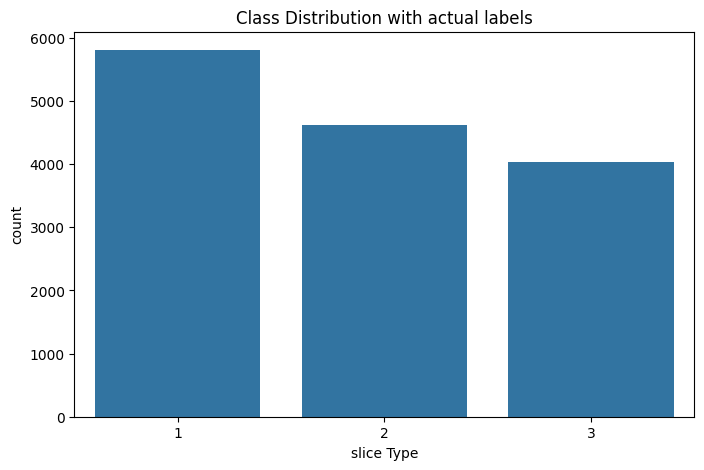

In [296]:
# Class Distribution Analysis after removing empty columns
plt.figure(figsize=(8, 5))
sns.countplot(x=data['slice Type'])
plt.title('Class Distribution with actual labels')
plt.show()

In [297]:
# Print missing values count for each column
print(data.isna().sum())

X                0
Seq              0
Dur              0
RunTime          0
Mean             0
Sum              0
Min              0
Max              0
sTos             1
dTos          3887
sTtl             1
dTtl          3923
sHops            1
dHops         3899
TotPkts          0
SrcPkts          0
DstPkts          0
TotBytes         0
SrcBytes         0
DstBytes         0
Offset           0
sMeanPktSz       0
dMeanPktSz       0
Load             0
SrcLoad          0
DstLoad          0
Loss             0
SrcLoss          0
DstLoss          0
pLoss            0
SrcGap        3113
DstGap        3113
Rate             0
SrcRate          0
DstRate          0
SrcWin        3230
DstWin        4243
SrcTCPBase    3113
DstTCPBase    4384
TcpRtt           0
SynAck           0
AckDat           0
UniqueID         0
slice Type       0
dtype: int64


### **Filter columns with few missing data**

In [298]:
# Check for missing values (NaN)
missing_values = data.isna().sum()

# Print missing values count for each column
print(missing_values)

X                0
Seq              0
Dur              0
RunTime          0
Mean             0
Sum              0
Min              0
Max              0
sTos             1
dTos          3887
sTtl             1
dTtl          3923
sHops            1
dHops         3899
TotPkts          0
SrcPkts          0
DstPkts          0
TotBytes         0
SrcBytes         0
DstBytes         0
Offset           0
sMeanPktSz       0
dMeanPktSz       0
Load             0
SrcLoad          0
DstLoad          0
Loss             0
SrcLoss          0
DstLoss          0
pLoss            0
SrcGap        3113
DstGap        3113
Rate             0
SrcRate          0
DstRate          0
SrcWin        3230
DstWin        4243
SrcTCPBase    3113
DstTCPBase    4384
TcpRtt           0
SynAck           0
AckDat           0
UniqueID         0
slice Type       0
dtype: int64


In [108]:
# # Create a dictionary for columns with missing values
# columns_with_missing = {}

# # Iterate through the dictionary of missing values
# for column, count in missing_values.items():
#     columns_with_missing[column] = count

# # Print the dictionary
# print(columns_with_missing)

In [299]:
# Identify all the columns and the missing value count in them
# Create a dictionary for columns with missing values
filtered_columns_with_missing = {}

# Filter out columns with non-zero missing value counts
for column, count in missing_values.items():
    if count != 0 and count > 10:
      filtered_columns_with_missing[column] = count

# Print the filtered dictionary
print(filtered_columns_with_missing)

{'dTos': 3887, 'dTtl': 3923, 'dHops': 3899, 'SrcGap': 3113, 'DstGap': 3113, 'SrcWin': 3230, 'DstWin': 4243, 'SrcTCPBase': 3113, 'DstTCPBase': 4384}


In [300]:
for column, count in filtered_columns_with_missing.items():
  print(data[column].unique(), "\n\n",data[column].value_counts(dropna=False), "\n\n\n")

[184.  nan   0. 186.  48.  40.] 

 0.0      10552
NaN       3887
186.0       10
184.0        4
40.0         2
48.0         1
Name: dTos, dtype: int64 



[255.  nan 117.  64. 116.  62.  53.  63.  52. 252. 250.  59.  47.  54.] 

 59.0     6924
NaN      3923
117.0    1933
64.0      896
116.0     413
53.0      303
62.0       16
255.0      12
63.0       11
54.0        8
52.0        7
47.0        6
252.0       2
250.0       2
Name: dTtl, dtype: int64 



[ 1. nan 11.  0. 12.  2.  4.  6.  5. 17. 10.] 

 5.0     6564
NaN     3899
11.0    2452
0.0      896
1.0      431
12.0     180
2.0       16
10.0       8
17.0       6
4.0        2
6.0        2
Name: dHops, dtype: int64 



[nan  0.] 

 0.0    11343
NaN     3113
Name: SrcGap, dtype: int64 



[nan  0.] 

 0.0    11343
NaN     3113
Name: DstGap, dtype: int64 



[         nan 1.635000e+03 3.355392e+07 6.809600e+04 9.779200e+04
 1.751000e+03 4.094000e+03 8.294400e+04 3.706880e+06 2.610000e+02
 1.677696e+07 1.800000e+02 1.304064e+06 7.577600e+04

In [301]:
# List of all columns containing missing values
columns_to_remove = list(filtered_columns_with_missing.keys())
columns_to_remove

['dTos',
 'dTtl',
 'dHops',
 'SrcGap',
 'DstGap',
 'SrcWin',
 'DstWin',
 'SrcTCPBase',
 'DstTCPBase']

In [302]:
data = data.drop(columns=columns_to_remove)
data

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,sTtl,...,DstLoss,pLoss,Rate,SrcRate,DstRate,TcpRtt,SynAck,AckDat,UniqueID,slice Type
0,34555.000000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,224.0,250.0,...,0.000000,0.000000,3460.207764,0.000000,0.000000,0.000000,0.000000,0.000000,1.443790e+05,3
1,531568.000000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,249.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.816910e+05,3
2,360399.000000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,0.0,63.0,...,0.000000,0.000000,0.390587,0.390587,0.000000,0.000000,0.000000,0.000000,1.755800e+05,3
3,30702.000000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,0.0,64.0,...,0.000000,0.000000,108.662582,43.465034,43.465034,0.000000,0.000000,0.000000,1.202390e+05,3
4,312747.000000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,63.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.486120e+05,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,0.0,63.0,...,1.000000,10.105935,3.821267,2.019412,1.594339,0.595314,0.723920,0.032170,2.373585e+06,2
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,0.0,63.0,...,0.491782,9.210293,3.722216,2.029394,1.400239,0.652207,0.874332,0.028468,2.367298e+06,2
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,0.0,63.0,...,1.000000,10.360201,3.840632,2.037339,1.626468,0.876566,0.250007,0.041358,2.383580e+06,2
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,0.0,63.0,...,0.954034,7.659634,3.244096,1.797084,1.408035,0.547553,0.645027,0.027258,2.384146e+06,2


In [303]:
# Print missing values count for each column
print(data.isna().sum())

X             0
Seq           0
Dur           0
RunTime       0
Mean          0
Sum           0
Min           0
Max           0
sTos          1
sTtl          1
sHops         1
TotPkts       0
SrcPkts       0
DstPkts       0
TotBytes      0
SrcBytes      0
DstBytes      0
Offset        0
sMeanPktSz    0
dMeanPktSz    0
Load          0
SrcLoad       0
DstLoad       0
Loss          0
SrcLoss       0
DstLoss       0
pLoss         0
Rate          0
SrcRate       0
DstRate       0
TcpRtt        0
SynAck        0
AckDat        0
UniqueID      0
slice Type    0
dtype: int64


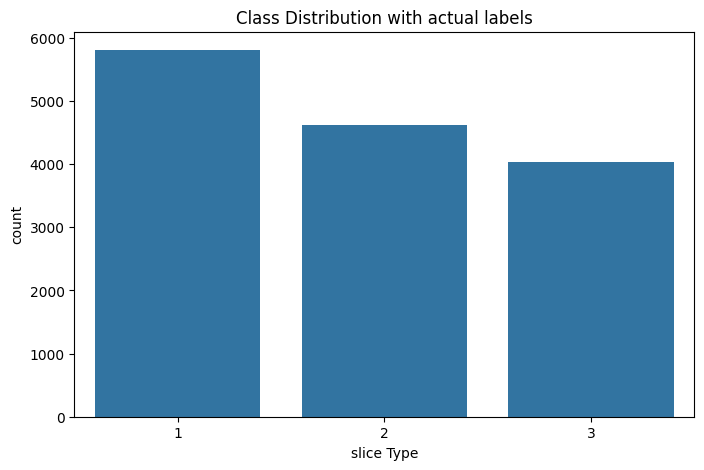

In [304]:
# Class Distribution Analysis after removing empty rows
plt.figure(figsize=(8, 5))
sns.countplot(x=data['slice Type'])
plt.title('Class Distribution with actual labels')
plt.show()

### **Drop empty rows**

In [409]:
len(data)

14456

In [410]:
data = data.dropna()
data

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstWin,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,slice Type
0,34555.000000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,224.0,184.0,...,64896.0,610.0,610.0,1.777045e+09,2.646975e+09,0.000000,0.000000,0.000000,1.443790e+05,3.0
1,531568.000000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,64896.0,610.0,610.0,1.777045e+09,2.646975e+09,0.000000,0.000000,0.000000,1.816910e+05,3.0
2,360399.000000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,0.0,0.0,...,64896.0,610.0,610.0,1.777045e+09,2.646975e+09,0.000000,0.000000,0.000000,1.755800e+05,3.0
3,30702.000000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,0.0,0.0,...,64896.0,610.0,610.0,1.777045e+09,2.646975e+09,0.000000,0.000000,0.000000,1.202390e+05,3.0
4,312747.000000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,64896.0,610.0,610.0,1.777045e+09,2.646975e+09,0.000000,0.000000,0.000000,3.486120e+05,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,0.0,0.0,...,64896.0,610.0,610.0,1.202037e+09,1.485176e+08,0.595314,0.723920,0.032170,2.373585e+06,2.0
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,0.0,0.0,...,64896.0,610.0,610.0,1.202037e+09,1.485176e+08,0.652207,0.874332,0.028468,2.367298e+06,2.0
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,0.0,0.0,...,64896.0,610.0,610.0,1.202037e+09,1.485176e+08,0.876566,0.250007,0.041358,2.383580e+06,2.0
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,0.0,0.0,...,64896.0,610.0,610.0,1.202037e+09,1.485176e+08,0.547553,0.645027,0.027258,2.384146e+06,2.0


## **Class Distribution Analysis After Data Cleaning**

In [411]:
np.unique(data['slice Type'])

array([1., 2., 3.])

In [412]:
data['slice Type'] = data['slice Type'].astype(int)
np.unique(data['slice Type'])

array([1, 2, 3])

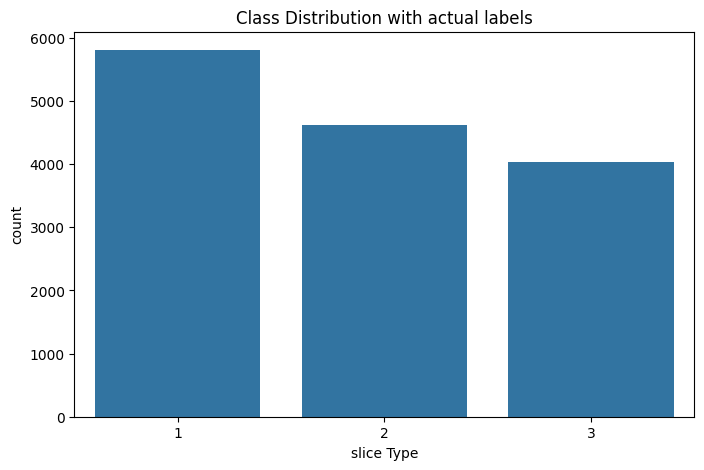

In [413]:
# Class Distribution Analysis after Data Cleaning
plt.figure(figsize=(8, 5))
sns.countplot(x=data['slice Type'])
plt.title('Class Distribution with actual labels')
plt.show()

## **Feature Importance**

In [414]:
X = data.drop(columns=['slice Type'])
features = X.columns.tolist()
features
y = data['slice Type']

In [415]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3)  # Adjust number of clusters as needed
kmeans.fit(X_scaled)

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Calculate feature importance based on range of feature values across cluster centers
feature_importance = X_scaled.max(axis=0) - X_scaled.min(axis=0)
feature_importance

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([  3.51601068,   5.24033337,   2.95164187,   2.95145022,
         2.94776757,   2.94465643,   2.9466467 ,   2.94555111,
        34.30584319,  32.06649728,   7.11111645,   9.38190354,
         9.93075056,   5.87809514,   8.54666686,  10.38312554,
         9.36721972,   9.31708422,  36.19025799,   9.39651054,
         4.76182708,  11.18145253,   2.65614855, 101.07440784,
        87.46531687, 101.43485904,   8.61469967,   8.09386876,
         8.58658339,   4.88302873,   0.        ,   0.        ,
        96.48158737,  87.48360017, 101.43536156,   8.53823199,
        84.86116527,   0.        ,   0.        ,   4.65100399,
         3.70311137,   7.97658137,   7.92636757,  11.01398612,
         2.96019754])

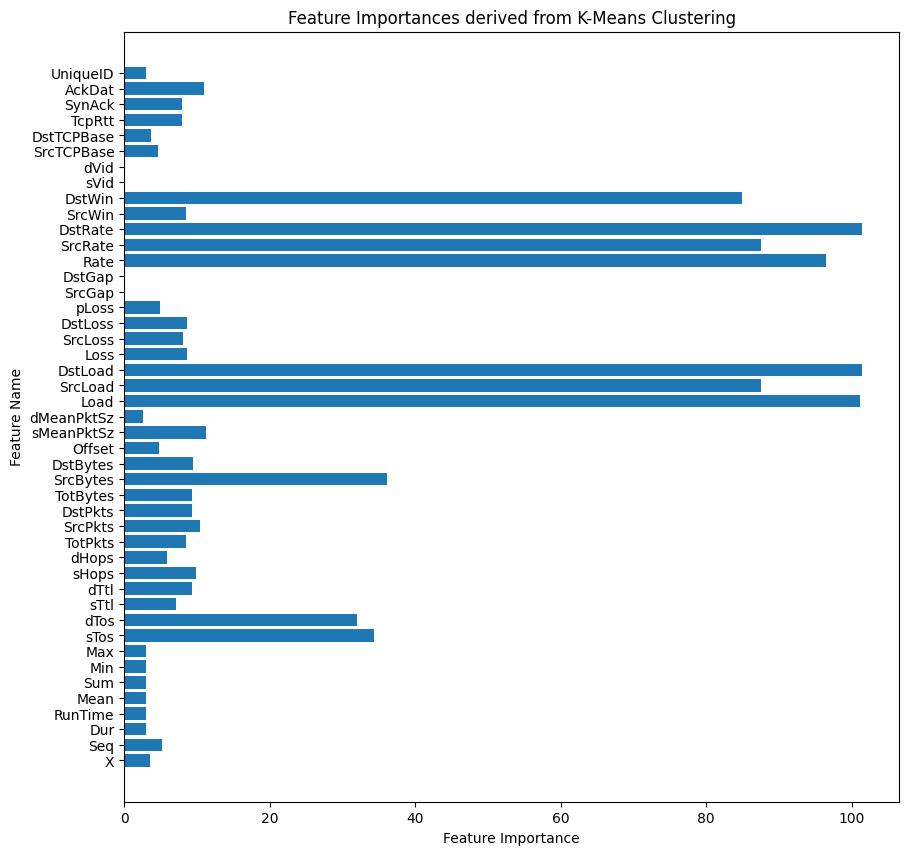

In [416]:
# Calculate feature importance based on range of feature values across cluster centers
feature_importance = X_scaled.max(axis=0) - X_scaled.min(axis=0)

# Plot feature importances
plt.figure(figsize=(10, 10))
plt.barh(features, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importances derived from K-Means Clustering')
plt.show()

## **Feature Selection**

In [417]:
# Filter features with importance score greater than 20
selected_features = [feature for feature, importance in zip(features, feature_importance) if importance > 1]
selected_features

['X',
 'Seq',
 'Dur',
 'RunTime',
 'Mean',
 'Sum',
 'Min',
 'Max',
 'sTos',
 'dTos',
 'sTtl',
 'dTtl',
 'sHops',
 'dHops',
 'TotPkts',
 'SrcPkts',
 'DstPkts',
 'TotBytes',
 'SrcBytes',
 'DstBytes',
 'Offset',
 'sMeanPktSz',
 'dMeanPktSz',
 'Load',
 'SrcLoad',
 'DstLoad',
 'Loss',
 'SrcLoss',
 'DstLoss',
 'pLoss',
 'Rate',
 'SrcRate',
 'DstRate',
 'SrcWin',
 'DstWin',
 'SrcTCPBase',
 'DstTCPBase',
 'TcpRtt',
 'SynAck',
 'AckDat',
 'UniqueID']

In [418]:
# Create a new DataFrame with selected features and label y
data_filtered = data[selected_features + ['slice Type']]
data = data_filtered
data

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,slice Type
0,34555.000000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,224.0,184.0,...,0.000000,56704.0,64896.0,1.777045e+09,2.646975e+09,0.000000,0.000000,0.000000,1.443790e+05,3
1,531568.000000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,56704.0,64896.0,1.777045e+09,2.646975e+09,0.000000,0.000000,0.000000,1.816910e+05,3
2,360399.000000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,0.0,0.0,...,0.000000,56704.0,64896.0,1.777045e+09,2.646975e+09,0.000000,0.000000,0.000000,1.755800e+05,3
3,30702.000000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,0.0,0.0,...,43.465034,56704.0,64896.0,1.777045e+09,2.646975e+09,0.000000,0.000000,0.000000,1.202390e+05,3
4,312747.000000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,56704.0,64896.0,1.777045e+09,2.646975e+09,0.000000,0.000000,0.000000,3.486120e+05,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,0.0,0.0,...,1.594339,64256.0,64896.0,1.202037e+09,1.485176e+08,0.595314,0.723920,0.032170,2.373585e+06,2
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,0.0,0.0,...,1.400239,64256.0,64896.0,1.202037e+09,1.485176e+08,0.652207,0.874332,0.028468,2.367298e+06,2
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,0.0,0.0,...,1.626468,64256.0,64896.0,1.202037e+09,1.485176e+08,0.876566,0.250007,0.041358,2.383580e+06,2
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,0.0,0.0,...,1.408035,64256.0,64896.0,1.202037e+09,1.485176e+08,0.547553,0.645027,0.027258,2.384146e+06,2


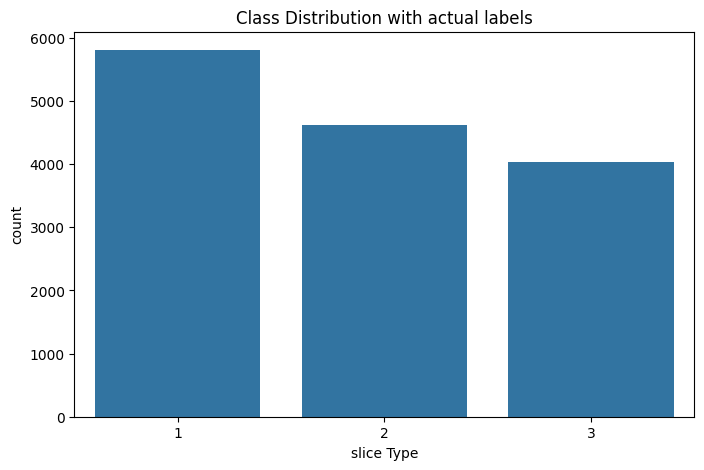

In [419]:
# Class Distribution Analysis after Data Cleaning
plt.figure(figsize=(8, 5))
sns.countplot(x=data['slice Type'])
plt.title('Class Distribution with actual labels')
plt.show()

## **Data Evaluation using K-Means**

In [428]:
use_backup = 1
if use_backup == 1:
  data = data_backup
  print("DataBackup Loaded")
else:
  data_backup = data
  print("DataBackup Complete")

DataBackup Loaded


In [429]:
X = data.drop(columns=['slice Type'])
y = data['slice Type']
np.unique(y)

array([1, 2, 3])

In [430]:
use_tsne = 1
if use_tsne == 1:
  # Apply T-SNE to reduce to 2 dimensions
  tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
  temp_X = X
  X = tsne.fit_transform(temp_X)
  print("TSNE Applied")
else:
  print("No TSNE Applied")

TSNE Applied


In [436]:
# Create a KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model
kmeans.fit(X)

# Get cluster labels
labels = kmeans.labels_
labels_aligned = labels + 1

# Get cluster centroids
centroids = kmeans.cluster_centers_

actual_label = y
predicted_label = labels_aligned

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [437]:
if use_tsne == 1:
  # Map cluster labels to X data points
  X_with_actual_label = pd.DataFrame({'Feature1': X[:, 0], 'Feature2': X[:, 1], 'slice Type': actual_label})
else:
  X_with_actual_label = data
X_with_actual_label

,Feature1,Feature2,slice Type
0,15.090828,-27.230648,3
1,11.195743,2.685981,3
2,-13.485908,38.803860,3
3,17.243618,-17.772873,3
4,-27.375095,14.105544,3
...,...,...,...
14451,108.113464,7.281148,2
14452,107.335358,6.793242,2
14453,108.139008,7.659498,2
14454,107.338295,7.914145,2


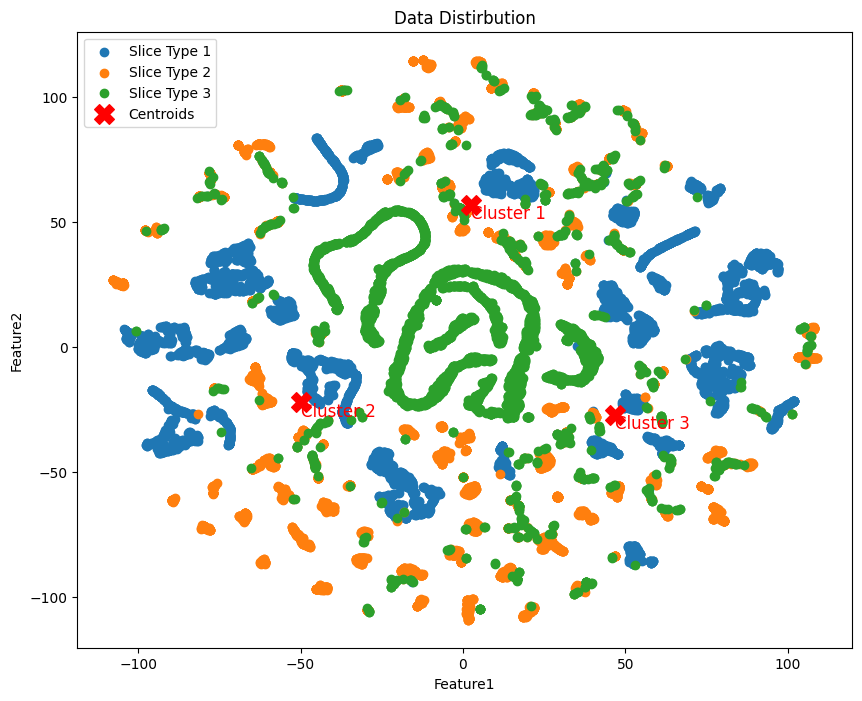

In [438]:
# Plot the scatter plot with different colors for each cluster
plt.figure(figsize=(10, 8))
for cluster in range(1, len(np.unique(actual_label))+1):
    cluster_data = X_with_actual_label[X_with_actual_label['slice Type'] == cluster]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Slice Type {cluster}')

# Plot centroids
# centroids_temp = scaler.transform(centroids)
centroids_temp = centroids
plt.scatter(centroids_temp[:, 0], centroids_temp[:, 1], marker='X', s=200, c='red', label='Centroids')

for i, centroid in enumerate(centroids_temp):
    plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='red', fontsize=12, ha='left', va='top')

plt.title('Data Distirbution')
plt.xlabel(X_with_actual_label.columns[0])
plt.ylabel(X_with_actual_label.columns[1])
plt.legend(loc='upper left')
plt.show()

In [434]:
# Performance Metrics
print("Silhouette Score", metrics.silhouette_score(X, predicted_label))
print("Accuracy", accuracy_score(actual_label, predicted_label))
print("Precision", precision_score(actual_label, predicted_label, average='weighted'))
print("Recall", recall_score(actual_label, predicted_label, average='weighted'))
print("F1-score", f1_score(actual_label, predicted_label, average='weighted'))

Silhouette Score 0.3654458
Accuracy 0.271721084670725
Precision 0.270926587102463
Recall 0.271721084670725
F1-score 0.2683437291280801


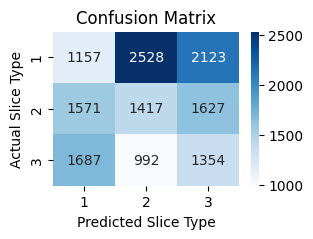

In [435]:
# Confusion Matrix
plt.figure(figsize=(3, 2))
cm = confusion_matrix(actual_label, predicted_label)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(actual_label), yticklabels=np.unique(predicted_label))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Slice Type')
plt.ylabel('Actual Slice Type')
plt.show()

## **Save cleaned data**

In [ ]:
data.to_csv('/content/drive/MyDrive/Dataset/Global_cleaned.csv', index=False)

# **SYNC NOTEBOOKS**

In [ ]:
%cp '/content/drive/MyDrive/Colab Notebooks/Exp10 - Data_Preprocessing.ipynb' '/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Notebooks/'

In [ ]:
%cp '/content/drive/MyDrive/Dataset/Global_cleaned.csv' '/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Datasets/'